In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('dataset/Algerian_forest_fires_dataset.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
df. isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [ ]:
df.corr

<bound method DataFrame.corr of     day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fir

In [174]:
df['rain'].max()


np.float64(6.4)

In [175]:
(df["rain"]>0).sum()

np.int64(8)

In [176]:
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [ ]:
month_map={
    'mar':3, 'oct':10, 'aug':8, 'sep':9, 'apr':4, 'jun':6, 'jul':7, 'feb':2, 'jan':1,
       'dec':12, 'may':5, 'nov':11
}

In [178]:
df["month_numeric"]=df['month'].map(month_map)

In [ ]:
df['month_numeric'].unique()

array([ 3, 10,  8,  9,  4,  6,  7,  2,  1, 12,  5, 11])

In [180]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_numeric
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3


In [181]:
df["month"]=df["month_numeric"]
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_numeric
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3


In [182]:
df.drop("month_numeric",axis=1,inplace=True)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [183]:
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [184]:
day_map={
    'fri':6, 'tue':3, 'sat':7, 'sun':1, 'mon':2, 'wed':4, 'thu':5
}

In [185]:
df["day"]=df["day"].map(day_map)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [186]:
df['area'].mean()

np.float64(12.847292069632493)

In [187]:
corr_matrix=df.corr(numeric_only=True)
print(corr_matrix["area"].sort_values(ascending=True))

RH      -0.075519
rain    -0.007366
ISI      0.008258
wind     0.012317
FFMC     0.040122
Y        0.044873
day      0.048359
DC       0.049383
month    0.056496
X        0.063385
DMC      0.072994
temp     0.097844
area     1.000000
Name: area, dtype: float64


<Axes: >

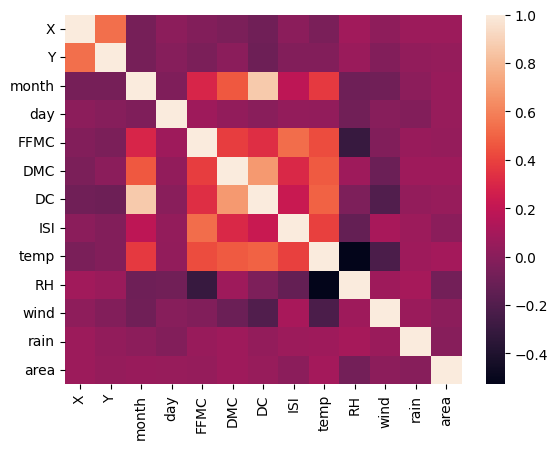

In [188]:
sns.heatmap(df.corr())

In [189]:
df.corr()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,0.013037,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.013085,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.037469,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,0.013037,-0.013085,-0.037469,1.000000,0.073597,0.028697,0.001913,0.035926,0.032233,-0.083318,-0.004013,-0.024119,0.048359
FFMC,-0.021039,-0.046308,0.291477,0.073597,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.028697,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.001913,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.035926,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.032233,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,-0.083318,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


In [190]:
df["log_area"]=np.log(df['area']+1)

In [191]:
print(df['area'].mean())
print(df['log_area'].mean())

12.847292069632493
1.1110257652960878


In [192]:
df["temp_wind"]=df["temp"]*df["wind"]
df["FFMC_DMC"]=df["FFMC"]*df["DMC"]
df["FFMC_temp"]=df["FFMC"]*df["temp"]


In [193]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area,temp_wind,FFMC_DMC,FFMC_temp
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,54.94,2258.44,706.84
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,16.20,3207.24,1630.80
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,18.98,3959.22,1322.76
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,33.20,3053.61,761.11
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,20.52,4581.09,1018.02


In [194]:
corr_matrix=df.corr(numeric_only=True)
print(corr_matrix["area"].sort_values(ascending=True))

RH          -0.075519
rain        -0.007366
ISI          0.008258
wind         0.012317
FFMC         0.040122
Y            0.044873
day          0.048359
DC           0.049383
month        0.056496
X            0.063385
DMC          0.072994
FFMC_DMC     0.075021
temp_wind    0.082253
temp         0.097844
FFMC_temp    0.098072
log_area     0.524134
area         1.000000
Name: area, dtype: float64


In [195]:
corr_matrix=df.corr(numeric_only=True)
print(corr_matrix["log_area"].sort_values(ascending=True))

RH          -0.053662
ISI         -0.010347
day         -0.005416
rain         0.023311
Y            0.038838
FFMC         0.046799
temp         0.053487
FFMC_temp    0.057828
temp_wind    0.059740
X            0.061995
DC           0.066360
wind         0.066973
DMC          0.067153
FFMC_DMC     0.068400
month        0.114280
area         0.524134
log_area     1.000000
Name: log_area, dtype: float64


In [196]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area,temp_wind,FFMC_DMC,FFMC_temp
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,54.94,2258.44,706.84
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,16.20,3207.24,1630.80
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,18.98,3959.22,1322.76
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,33.20,3053.61,761.11
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,20.52,4581.09,1018.02


In [197]:
X=df.drop(["area","log_area"],axis=1)
y=df["log_area"]
X

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,temp_wind,FFMC_DMC,FFMC_temp
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,54.94,2258.44,706.84
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,16.20,3207.24,1630.80
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,18.98,3959.22,1322.76
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,33.20,3053.61,761.11
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,20.52,4581.09,1018.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,75.06,4626.72,2268.48
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,127.02,4626.72,1787.04
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,142.04,4626.72,1729.92
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,102.40,13782.40,2416.64


In [198]:
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: log_area, Length: 517, dtype: float64

In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [214]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [215]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [216]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "ElasticNet":ElasticNet(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "SVR":SVR(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    "XGBRegressor":XGBRegressor()
}

In [217]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [218]:
X_train_scaled.shape

(387, 15)

In [219]:
X.shape

(517, 15)

In [220]:
df.shape

(517, 17)

In [221]:
# df['fire_occured']=df['log_area'].apply(lambda x:1 if x>0 else 0)
# df.head()


In [222]:
# df.drop(["fire_occured"],axis=1,inplace=True)

In [223]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area,temp_wind,FFMC_DMC,FFMC_temp
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,54.94,2258.44,706.84
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,16.20,3207.24,1630.80
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,18.98,3959.22,1322.76
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,33.20,3053.61,761.11
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,20.52,4581.09,1018.02


In [224]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(r2_score(y_test,y_pred))

0.007221515900901032


In [229]:
import pickle as pkl
with open("forest.pkl","wb") as f:
    pkl.dump(model,f)

In [231]:
with open("scaler.pkl","wb") as b:
    pkl.dump(ss,b)

### classification models

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [88]:
classification_models={
    "Logistic Regression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "SVC":SVC(),
    "XGBClassifier":XGBClassifier()
}

In [160]:
import warnings
warnings.filterwarnings("ignore")
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(f"{name}:\n mse:{mse} | mae:{mae} | r2_score:{r2}")
    print()

LinearRegression:
 mse:2.1947653700639815 | mae:1.1738878197098508 | r2_score:0.001408734011399182

Ridge:
 mse:2.1931033680690106 | mae:1.1744000398471317 | r2_score:0.0021649244902863796

Lasso:
 mse:2.1992238175877623 | mae:1.2027975534862927 | r2_score:-0.0006198048100358733

ElasticNet:
 mse:2.1992238175877623 | mae:1.2027975534862927 | r2_score:-0.0006198048100358733

DecisionTreeRegressor:
 mse:4.075600063851157 | mae:1.3453612731492253 | r2_score:-0.854347933011949

SVR:
 mse:2.505630804168971 | mae:1.105991808990436 | r2_score:-0.14003121744270453

KNeighborsRegressor:
 mse:2.6987261328815273 | mae:1.2656040010465164 | r2_score:-0.22788721853768035

RandomForestRegressor:
 mse:2.2449231388394173 | mae:1.1996424558238057 | r2_score:-0.021412434257337187

XGBRegressor:
 mse:2.52457319569072 | mae:1.2467164891409401 | r2_score:-0.14864977275096636



LinearRegression and Ridge has good r2_score whereas remaining don't.

In [99]:
X=df.drop(["fire_occured","area"],axis=1)
y=df["fire_occured"]

In [107]:
from sklearn.model_selection import train_test_split
X_train_c,X_test_c,y_train_c,y_test_c=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled_c=sc.fit_transform(X_train_c)
X_test_scaled_c=sc.transform(X_test_c)

In [114]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
for names,model in classification_models.items():
    model.fit(X_train_scaled_c,y_train_c)
    y_pred_c=model.predict(X_test_c)
    ac=accuracy_score(y_test_c,y_pred_c)
    ps=precision_score(y_test_c,y_pred_c)
    rs=recall_score(y_test_c,y_pred_c)
    cr=classification_report(y_test_c,y_pred_c)
    print(f"{names}:\n accuracy score: {ac} | precision score: {ps} |recall score: {rs} | classification report {cr}")

Logistic Regression:
 accuracy score: 0.4230769230769231 | precision score: 0.34782608695652173 |recall score: 0.11764705882352941 | classification report               precision    recall  f1-score   support

           0       0.44      0.76      0.56        62
           1       0.35      0.12      0.18        68

    accuracy                           0.42       130
   macro avg       0.39      0.44      0.37       130
weighted avg       0.39      0.42      0.36       130

DecisionTreeClassifier:
 accuracy score: 0.5230769230769231 | precision score: 0.5230769230769231 |recall score: 1.0 | classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.52      1.00      0.69        68

    accuracy                           0.52       130
   macro avg       0.26      0.50      0.34       130
weighted avg       0.27      0.52      0.36       130

RandomForestClassifier:
 accuracy score: 0.5230769

In [115]:
df["fire_occured"].value_counts()

fire_occured
1    270
0    247
Name: count, dtype: int64

In [ ]:
model=LinearRegression()
model

In [ ]:
import pickle as pkl
pkl.dump()

TypeError: dump() missing required argument 'obj' (pos 1)